# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. 

Цель: определить рыночную стоимость объектов недвижимости. Отследить аномалии и мошенническую деятельность. 

## Изучение данных из файла

In [1]:
import pandas as pd
from IPython.display import HTML, display
df = pd.read_csv('C:\\Users\\SpectNSK\\Desktop\\projects\\data set\\issl analis.csv',sep = '\t')
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

У нас большая таблица с пропусками, будет не просто,но надо обработать данные :)

## Предобработка данных

In [2]:
print(df.isna().mean()) #выбрал самый понятный мне метод
print(df.isnull().sum())

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor              

In [3]:
df['balcony'] = df['balcony'].fillna(0) #зануляем балконы. 
#print(df['is_apartment'].head(50))
df['is_apartment'] = df['is_apartment'].fillna(False) # большенство квартир наверняка не апартаменты 
df.dropna(subset = ['locality_name','floors_total'], inplace = True) #Удаляем пропуски в столбцах,где их процентно мало
df['days_exposition'] = df['days_exposition'].fillna(-999)
df['airports_nearest'] = df['airports_nearest'].fillna(-999)
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(-999)
df['parks_around3000'] = df['parks_around3000'].fillna(-999)
df['parks_nearest'] = df['parks_nearest'].fillna(-999)
df['ponds_around3000'] = df['ponds_around3000'].fillna(-999)
df['ponds_nearest'] = df['ponds_nearest'].fillna(-999) #Вставляем маркеры там,где пропусков много,но логичной замены не наблюдается
#Заменим в цикле отсутсвующие значения медианой.Так-как отсутствует большое количество значений и потерять эти данные не хочется
#Вероятно большенство квартиры типовые для своего города, поэтому уместно применить медиану.
#То же самое верно и для медианной площади кухни и жилой площади
#Оставшиеся пропуски можно удалить,так как их процент так же мал
median_ceiling_height_region = df.groupby('locality_name')['ceiling_height'].median()
for x_median in median_ceiling_height_region.index:
    df.loc[df['locality_name'] == x_median, 'ceiling_height'] = df.loc[df['locality_name'] == x_median, 'ceiling_height'].fillna(median_ceiling_height_region[x_median])

median_living_area = df.groupby('total_area')['living_area'].median()
for y_median in median_living_area.index:
    df.loc[df['total_area'] == y_median, 'living_area'] = df.loc[df['total_area'] == y_median, 'living_area'].fillna(median_living_area[y_median])

median_kitchen_area = df.groupby('total_area')['kitchen_area'].median()
for z_median in median_kitchen_area.index:
    df.loc[df['total_area'] == z_median, 'kitchen_area'] = df.loc[df['total_area'] == z_median, 'kitchen_area'].fillna(median_kitchen_area[z_median])
df.dropna(subset = ['ceiling_height','living_area', 'kitchen_area'], inplace = True)

df['locality_name'] = df['locality_name'].str.lower()
df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex = True)
df['locality_name'] = df['locality_name'].str.replace('деревня ', '', regex = True)
df = df[df['rooms'] > 0]
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') #Привёл тип данных к временному
df['floors_total'] = df['floors_total'].astype('int')
print(df.isnull().sum())


total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64


## Вывод

Пропусков больше нет. Там где это возможно заменили их на медианное значения, в иных случиях заменили пропуска маркерами для удобства их фильтрации в последующих этапах. Данные готовы к анализу

## Расчёты и добавление результатов в таблицу

In [4]:
df['price_square_meter'] =  df['last_price'] / df['total_area']
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
def floor_group(row):    
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return "последний"
    return 'другой'


df['floor_group'] = df.apply(floor_group, axis = 1)
df['living/total'] = df['living_area'] / df['total_area']
df['kitchen/total'] = df['kitchen_area'] / df['total_area']


#df['day_name'] = df['first_day_exposition'].day_name()
#print(df['day_name'].head(10))

## Вывод

Расчитали и добавили ещё 7 столбцов,теперь у нас есть всё необходимое для визуализации и выполнения цели проекта 

## Исследовательский анализ данных

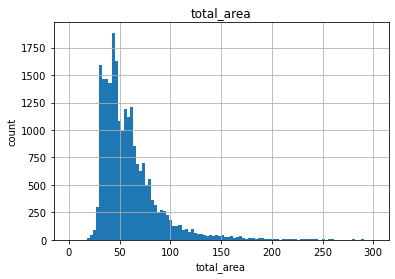

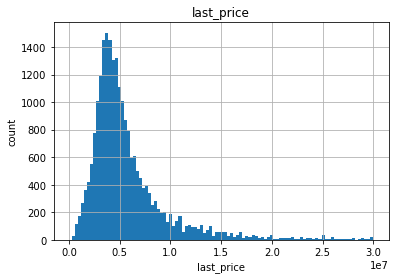

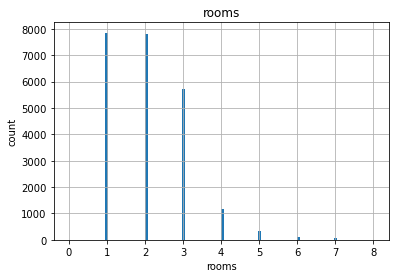

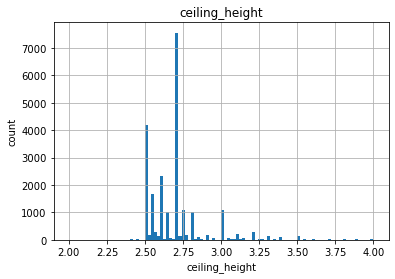

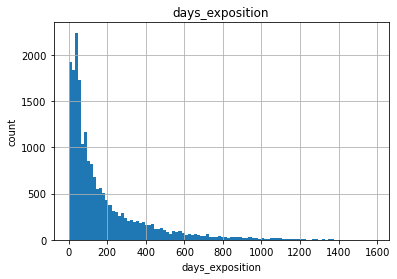

count    19925.000000
mean       181.828708
std        220.320992
min          1.000000
25%         45.000000
50%         96.000000
75%        233.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [5]:
import matplotlib.pyplot as plt 
df['total_area'].hist(bins=100, range=(0,300))
plt.title('total_area')
plt.xlabel('total_area')
plt.ylabel('count')
plt.show()
#Большинство квартир чуть менее 50 квадратов. Данные выглядят правдоподобно и распределены нормально  
df['last_price'].hist(bins=100, range=(0,30000000))
plt.title('last_price')
plt.xlabel('last_price')
plt.ylabel('count')
plt.show()
#Распределение нормальное большинство квартир стоит около 0,5
df['rooms'].hist(bins=100, range=(0,8))
plt.title('rooms')
plt.xlabel('rooms')
plt.ylabel('count')
plt.show()
# Почти все квартиры имеют 1-4 комнаты
df['ceiling_height'].hist(bins=100, range=(2,4))
plt.title('ceiling_height')
plt.xlabel('ceiling_height')
plt.ylabel('count')
plt.show()
#Высота потолков в основном типичная.
data_days_exposition = df.query('days_exposition > 0') #отбрасываем маркеры и неверные данные
data_days_exposition['days_exposition'].hist(bins=100)
plt.title('days_exposition')
plt.xlabel('days_exposition')
plt.ylabel('count')
plt.show()
data_days_exposition['days_exposition'].describe()
#Большинство продаж происходит в первые 150 дней.
#Нормальным временем продажи квартиры является срок до 230 дней.
#Необычно ранних продаж не бывает, необычно поздние наблюдаются на графике от 600 дней

count    23033.000000
mean        60.412765
std         34.415721
min         14.000000
25%         40.300000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

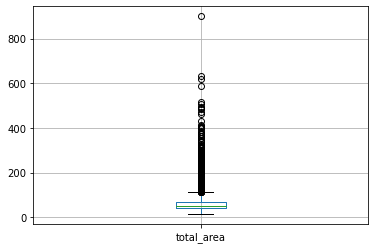

In [6]:
df.boxplot('total_area')
df['total_area'].describe()

count    2.303300e+04
mean     6.531087e+06
std      1.069274e+07
min      1.219000e+04
25%      3.490000e+06
50%      4.690000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

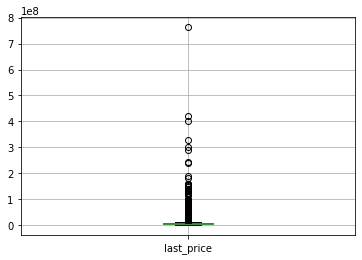

In [7]:
df.boxplot('last_price')
df['last_price'].describe()

count    23033.000000
mean         2.089003
std          1.063165
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

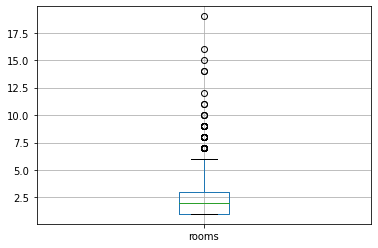

In [8]:
df.boxplot('rooms')
df['rooms'].describe()

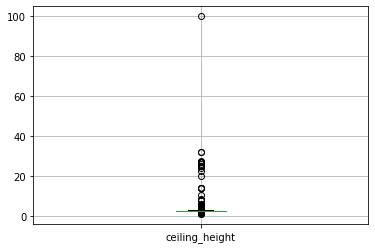

In [9]:
df.boxplot('ceiling_height')
df['ceiling_height'].describe()
df = df.query('total_area < 150 and rooms < 6 and ceiling_height < 5 and last_price < 20000000.0 and ceiling_height > 2 and cityCenters_nearest > 0')

В столбцах площадь и число комнат удалил выбросы руководствуясь усами
высоту потолков было решено оставить до 5 метров так как такие потолки вполне реальны

0.8061373227623411
0.5142972009635488
-0.35584015024519317


<AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>

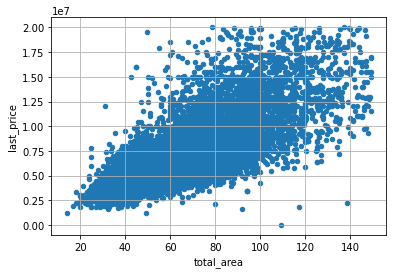

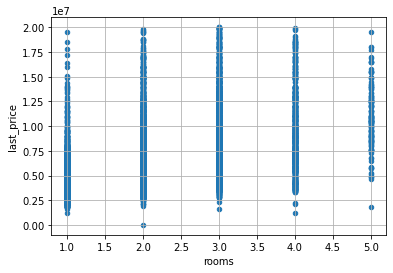

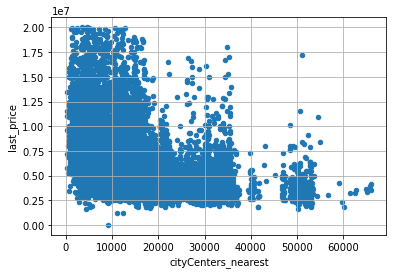

In [10]:
print(df['last_price'].corr(df['total_area'])) 
df.sort_values('total_area').plot(x='total_area',y='last_price', kind='scatter', grid=True)
print(df['last_price'].corr(df['rooms'])) 
df.sort_values('rooms').plot(x='rooms',y='last_price', kind='scatter', grid=True)
print(df['last_price'].corr(df['cityCenters_nearest']))
df.sort_values('cityCenters_nearest').plot(x='cityCenters_nearest',y='last_price', kind='scatter', grid=True)
#Площадь квартиры гораздо больше влияет на стоимость квартиры,чем число комнат
#Результат работы метода корр для расстояния от центра мне непонятен
#А вот на графике видно,что чем ближе к центру тем дороже
#На первом графике видны квартиры с большой площадью но маленькой ценой, предположу что это мошенники

Площадь квартиры гораздо больше влияет на стоимость квартиры,чем число комнат.
Результат работы метода корр для расстояния от центра мне непонятен.
А вот на графике видно,что чем ближе к центру тем дороже.
На первом графике видны квартиры с большой площадью но маленькой ценой, предположу что это мошенники

In [11]:
print(df['last_price'].corr(df['weekday'])) 
print(df['last_price'].corr(df['month'])) 
print(df['last_price'].corr(df['year']))
#связь цены продажи,с днём недели, месяцем или годом не наблюдается 

-0.015084138000741933
0.005381177217387302
-0.00820279118345194


In [12]:
df_floor = df.pivot_table(index=['floor_group'], values='last_price',aggfunc='median')
print(df_floor)

#На первом этажа самые дешевые квартиры, последний этаж так же не пользуется популярностью

             last_price
floor_group            
другой        5250000.0
первый        4550000.0
последний     4990000.0


In [13]:
print(df['locality_name'].value_counts().head(10))
df_2 = df.query('locality_name in ("санкт-петербург", "поселок шушары", "пушкин", "колпино", "поселок парголово", "петергоф", "сестрорецк", "красное село", "ломоносов", "кронштадт")')
#Придумал только вот так,как можно было это сделать элегантней?
df_3 = df_2.pivot_table(index='locality_name',values='price_square_meter', aggfunc = 'mean')
print(df_3.sort_values(by='price_square_meter', ascending = False)) 
# Самые дорогие квартиры ожидаемо в Санкт-Петербурге, а самые дешевые в Красном селе

санкт-петербург      14476
поселок шушары         433
пушкин                 352
колпино                335
поселок парголово      322
петергоф               198
сестрорецк             180
красное село           171
ломоносов              132
кронштадт               93
Name: locality_name, dtype: int64
                   price_square_meter
locality_name                        
санкт-петербург         108586.047023
пушкин                  101815.500474
сестрорецк              101678.757234
поселок парголово        90448.423806
петергоф                 84370.517082
кронштадт                79159.689931
поселок шушары           78188.645201
колпино                  75294.214582
ломоносов                72609.798019
красное село             71998.625491


Корреляция по площади Питер 0.8166502718681091
Корреляция по площади центр 0.690909678306547
Корреляция по комнатам Питер 0.5151531589622671
Корреляция по комнатам центр 0.4138107298036234
Корреляция по удаленности Питер -0.39660262792689893
Корреляция по удаленности центр -0.13799955664652175
Корреляция по потолкам Питер 0.40698398506926653
Корреляция по потолкам центр 0.1981744781105908
Корреляция по этажу Питер 0.03721612950327292
Корреляция по этажу центр 0.12055629595276103


<AxesSubplot:xlabel='total_area', ylabel='last_price'>

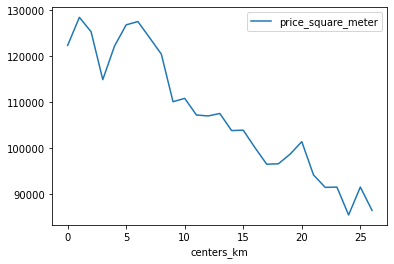

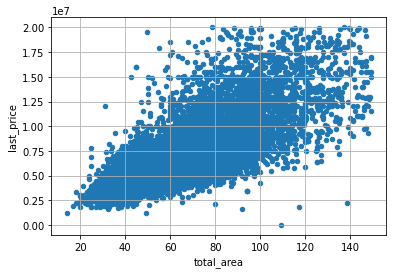

In [14]:
df['centers_km'] = df['cityCenters_nearest'] / 1000
df['centers_km'] = df['centers_km'].round()
df_piter = df.query('locality_name == "санкт-петербург" and centers_km >= 0')



piter = df_piter.pivot_table(index='centers_km', values='price_square_meter', aggfunc='mean')
piter = piter.query('centers_km < 27')
#уберем аномальное значение
piter.sort_values('centers_km').plot()
# Слом заметен на отметке 7км. Именно этот радиус и будем считать центром
piter_centr = df.query('locality_name == "санкт-петербург" and centers_km <= 7 and centers_km >= 0')

print('Корреляция по площади Питер', df_piter['last_price'].corr(df_piter['total_area'])) 
print('Корреляция по площади центр', piter_centr['last_price'].corr(piter_centr['total_area'])) 
print('Корреляция по комнатам Питер', df_piter['last_price'].corr(df_piter['rooms'])) 
print('Корреляция по комнатам центр', piter_centr['last_price'].corr(piter_centr['rooms'])) 
print('Корреляция по удаленности Питер', df_piter['last_price'].corr(df_piter['cityCenters_nearest']))
print('Корреляция по удаленности центр', piter_centr['last_price'].corr(piter_centr['cityCenters_nearest']))
print('Корреляция по потолкам Питер', df_piter['last_price'].corr(df_piter['ceiling_height']))
print('Корреляция по потолкам центр', piter_centr['last_price'].corr(piter_centr['ceiling_height']))
print('Корреляция по этажу Питер', df_piter['last_price'].corr(df_piter['floor']))
print('Корреляция по этажу центр', piter_centr['last_price'].corr(piter_centr['floor']))



df.sort_values('total_area').plot(x='total_area',y='last_price', kind='scatter', grid=True)

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

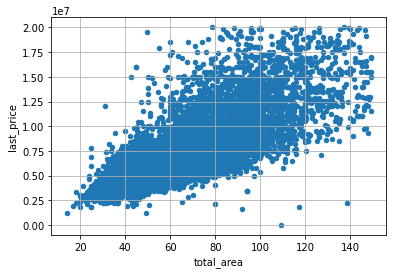

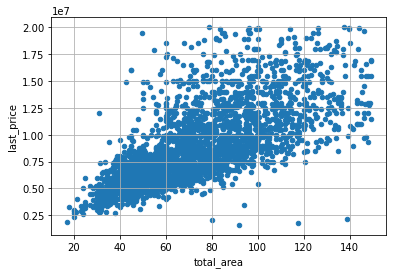

In [15]:
df_piter.sort_values('total_area').plot(x='total_area',y='last_price', kind='scatter', grid=True)
piter_centr.sort_values('total_area').plot(x='total_area',y='last_price', kind='scatter', grid=True)

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

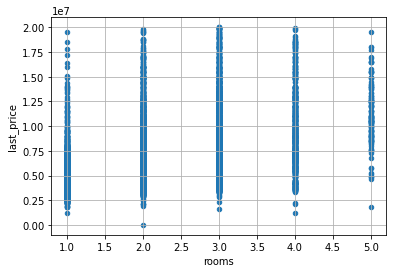

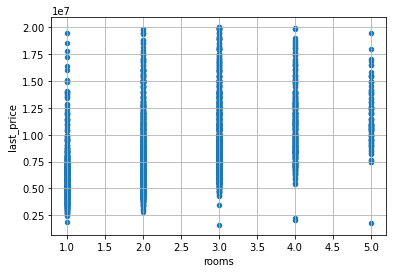

In [16]:
df_piter.sort_values('rooms').plot(x='rooms',y='last_price', kind='scatter', grid=True)
piter_centr.sort_values('rooms').plot(x='rooms',y='last_price', kind='scatter', grid=True)

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>

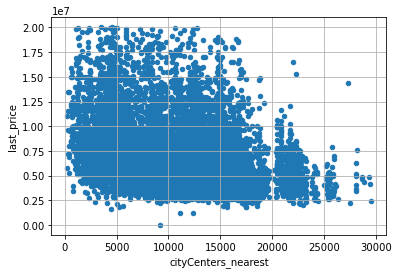

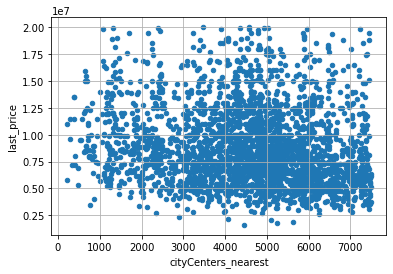

In [17]:
df_piter.sort_values('cityCenters_nearest').plot(x='cityCenters_nearest',y='last_price', kind='scatter', grid=True)
piter_centr.sort_values('cityCenters_nearest').plot(x='cityCenters_nearest',y='last_price', kind='scatter', grid=True)

<AxesSubplot:xlabel='ceiling_height', ylabel='last_price'>

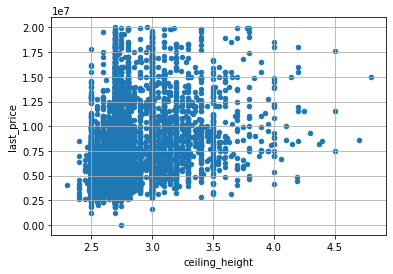

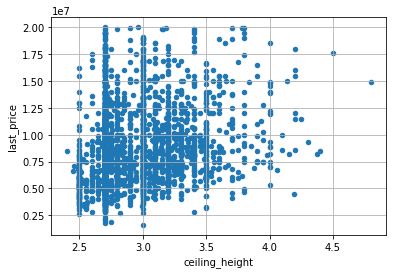

In [18]:
df_piter.sort_values('ceiling_height').plot(x='ceiling_height',y='last_price', kind='scatter', grid=True)
piter_centr.sort_values('ceiling_height').plot(x='ceiling_height',y='last_price', kind='scatter', grid=True)

<AxesSubplot:xlabel='floor', ylabel='last_price'>

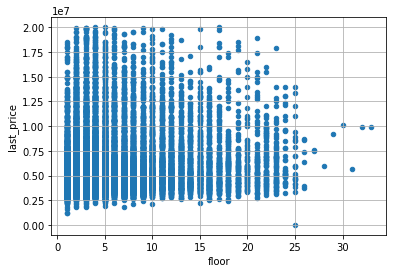

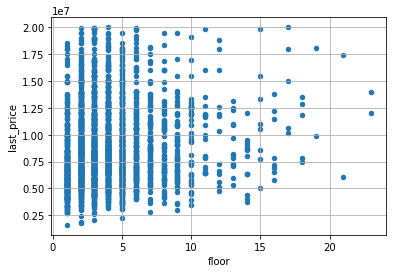

In [19]:
df_piter.sort_values('floor').plot(x='floor',y='last_price', kind='scatter', grid=True)
piter_centr.sort_values('floor').plot(x='floor',y='last_price', kind='scatter', grid=True)

## Вывод

В Центре квартиры дорогие, дальше центра цена квартиры сильно зависит от удаленности от центра.
    Данные по центру не сильно отличаются от общих данных по зависимости цены от площади, высоте потолков и числу комнат.
    А вот высоких этажей в центре гораздо меньше чем в целом по городу


## Общий вывод

На стоимость квартиры прямым образом влияет её площадь и удаленность от центра, остальные факторы гораздо меньше коррелируют с ценой.

## Рекомендации

Рекомендую удалять или проверять объявления, которые выбиваются из общего ряда данных. Они могут быть мошенническими